## Importing required libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. 
Download: https://www.kaggle.com/uciml/pima-indians-diabetes-database/download


**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**Blood pressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.groupby('label').count()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Cleaning records with zero values from dataset

In [6]:
pima = pima[pima.glucose != 0]
pima = pima[pima.bp != 0]
pima = pima[pima.skin != 0]

In [7]:
pima.groupby('label').count()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,357,357,357,357,357,357,357,357
1,177,177,177,177,177,177,177,177


### Create a copy of dataset

In [8]:
pima_copy=pima

In [9]:
pima_copy.to_csv("diabetes_clean.csv", index=False)

## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [10]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols] # Features
y = pima.label # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [12]:
print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 373
test size is 161


## Building Decision Tree Model
Let's create a Decision Tree Model using Sk-learn.

In [13]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [14]:
# teste
del pima_copy['label']

pima_copy.head()

#Predict the response for all dataset to compare results
pima_s_pred = classifier.predict(pima_copy)

pima_copy["tree"] = pima_s_pred
pima_copy.groupby('tree').count()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
tree,,,,,,,,
0,338,338,338,338,338,338,338,338
1,196,196,196,196,196,196,196,196


## Create result file
Let's create a result csv file to use.

In [15]:
print(y_pred)

[1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 0 1]


## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

report=metrics.classification_report(y_test,y_pred)

clf_name=['Decision Tree Diabetes','RegLog']

print('Reporting for %s:'%clf_name)

print(report)

Accuracy: 0.7453416149068323
Reporting for ['Decision Tree Diabetes', 'RegLog']:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        98
           1       0.66      0.71      0.69        63

    accuracy                           0.75       161
   macro avg       0.73      0.74      0.74       161
weighted avg       0.75      0.75      0.75       161



## Visualizing Decision Trees

C:\Users\carla\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


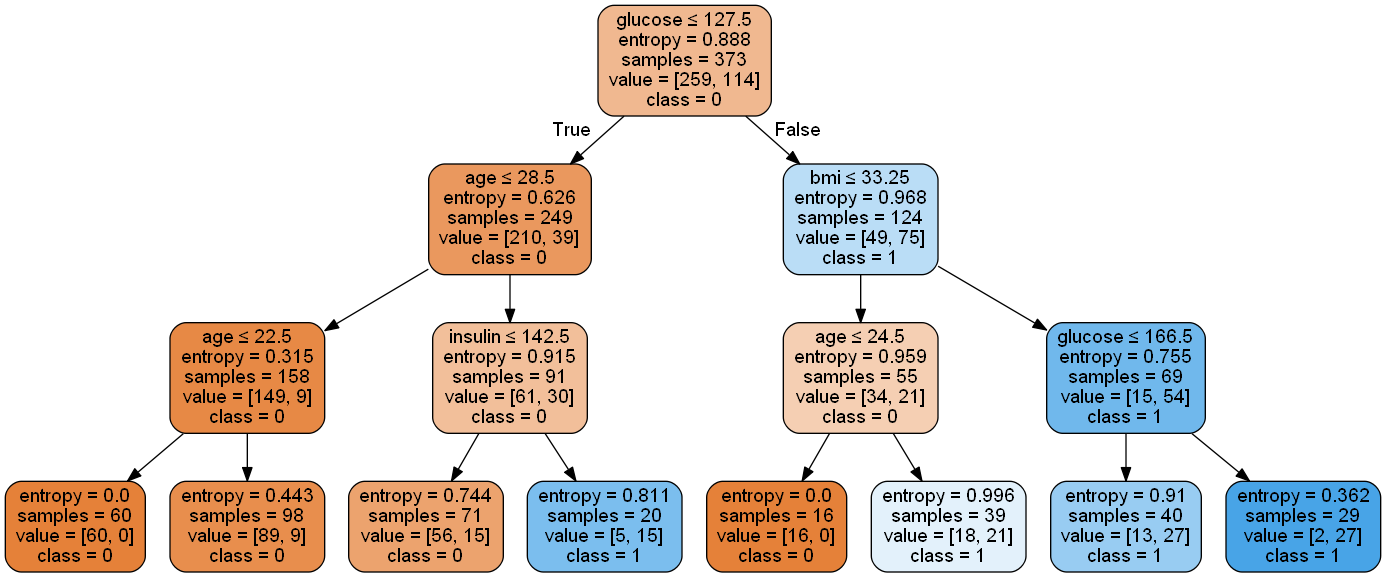

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This model is less complex, explainable and easy to understand.



## Pros
* Decision trees are easy to interpret and visualize.
* It can easily capture Non-linear patterns.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* It can be used for feature engineering such as predicting missing values, suitable for variable selection.

## Cons
* Sensitive to noisy data. It can overfit noisy data.
* The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
* Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.